In [1]:
# O objetivo deste exercício é testar as técnicas de subamostragem e sobreamostragem utilizando outra base de dados

# Carregue a base de dados csv_result-ebay_confianca_completo.csv usado para prever confiança de usuários baseado em traços de personalidade extraídos de textos

# A classe é o atributo 'reputation', que pode ser reputação 'boa' ou reputação 'ruim'

# Utilize o algoritmo Random Forest e faça os três testes. O algoritmo Naïve Bayes não terá um bom desempenho nesta base de dados, por isso precisamos utilizar o Random Forest que é um algoritmo baseado em árvores de decisão.

In [2]:
# Importação das bibliotecas para analise e manipluação de dados

import pandas as pd                                                # Analise e tratamento de dados
import numpy as np                                                 # Tratamento de dados numéricos
import random                                                      # Gerador de números aleatórios
import matplotlib.pyplot as plt                                    # Plotagem de gráficos
import seaborn as sns                                              # Plotagem de gráficos
from sklearn.model_selection import train_test_split               # Divisão de conjuntos de dados de treino e teste
from sklearn.ensemble import RandomForestClassifier                # Algoritmo Random Forest(Árvore de decisão)
from sklearn.metrics import confusion_matrix, accuracy_score       # Matriz de confusão e métricas de precisão e acurácia
from imblearn.under_sampling import TomekLinks                     # Subamostragem aleatória (undersampling)
from imblearn.over_sampling import SMOTE                           # Sobreamostragem aleatória (OverSampling)


In [3]:
# Carregamento da base de dados em uma variável

dados = pd.read_csv('../data/csv_result-ebay_confianca_completo.csv')
# 'csv_result-ebay_confianca_completo.csv' é uma base de dados usada para prever confiança de usuários baseado em traços de personalidade extraídos de textos

In [4]:
# Visualização da quantidade de registros

dados.shape

(5806, 75)

In [5]:
# Visualização dos primeiros registros do dataframe

dados.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


In [6]:
# Visualização dos últimos registros do dataframe

dados.tail()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
5803,49,0,N,6.069133,0.5,0,1.931712,0.5,1,5.616294,...,0.669362,0.602225,0.711554,0.644777,0.666970,0.742045,0.605412,0.650072,0.828953,Bom
5804,60,0,N,5.056324,0.5,0,3.152737,0.5,1,5.072437,...,0.698962,0.597975,0.690498,0.614929,0.614349,0.747452,0.640656,0.654348,0.801171,Ruim
5805,78,0,N,5.095499,0.4,0,3.535562,0.5,1,4.692843,...,0.710999,0.692540,0.728816,0.622679,0.708117,0.795567,0.697466,0.673904,0.832073,Bom
5806,95,0,N,4.780761,0.4,0,3.198620,0.5,1,4.563306,...,0.724970,0.718304,0.722504,0.573924,0.668312,0.805183,0.770677,0.710048,0.819924,Ruim
5807,53,0,N,4.525406,0.3,0,3.236950,0.5,1,4.488098,...,0.721490,0.601475,0.696407,0.642956,0.656245,0.712400,0.623931,0.633121,0.792092,Ruim


Dados em % :
 Bom     0.740441
Ruim    0.259559
Name: reputation, dtype: float64


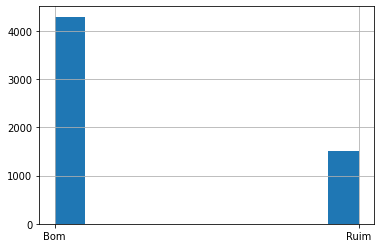

In [7]:
# Visualização da variável 'reputation' graficamente e em percentual

print('Dados em % :\n', dados['reputation'].value_counts('1'))
dados['reputation'].hist();

Dados em % :
 N    0.864967
B    0.135033
Name: blacklist, dtype: float64


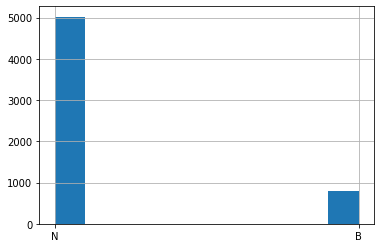

In [8]:
# Visualização da variável 'blacklist' graficamente e em percentual

print('Dados em % :\n', dados['blacklist'].value_counts('1'))
dados['blacklist'].hist();

In [9]:
# auteração da variavel 'blacklist' para booleano

dados['blacklist'] = dados['blacklist'] == 'N'

In [10]:
# outra opção é retirar a variável 'blacklist' do dataframe

# dados.drop('blacklist', axis=1, inplace=True)

In [11]:
# definição das variaveis para classificação

X = dados.iloc[ : , 0:74].values             # variaveis de entrada
X.shape                                      # dimensões da variavel X

(5806, 74)

In [12]:
# Visualização da variavel X em formato de array

X

array([[0, 49, True, ..., 0.6400725899947721, 0.598037041554872,
        0.828716381071851],
       [0, 56, True, ..., 0.6444645861342442, 0.603041772443901,
        0.8093789692710098],
       [0, 50, True, ..., 0.6554697130298307, 0.6450420335022421,
        0.82603890125472],
       ...,
       [78, 0, True, ..., 0.6974661634054785, 0.6739035045452172,
        0.8320726536961992],
       [95, 0, True, ..., 0.7706773179699052, 0.7100477615788761,
        0.8199238314070743],
       [53, 0, True, ..., 0.6239306346573744, 0.6331205213003834,
        0.7920921058167003]], dtype=object)

In [13]:
# definição da variavel y de saída

y = dados.iloc[ : , 74].values                    # variavel de saida
y.shape   

(5806,)

In [14]:
# Visualização da variavel y em formato de array

y

array(['Bom', 'Bom', 'Bom', ..., 'Bom', 'Ruim', 'Ruim'], dtype=object)

In [15]:
# divisão dos dados em conjunto de treino e teste usando a amostragem estratificada

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, stratify=y)

In [16]:
# dimensões do conjunto de treino

X_treino.shape, y_treino.shape                              

((4644, 74), (4644,))

In [17]:
# dimensões do conjunto de teste

X_teste.shape, y_teste.shape       

((1162, 74), (1162,))

In [18]:
# Visualização da quantidade de registros por classe treino

np.unique(y_treino, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([3439, 1205], dtype=int64))

In [19]:
# Visualização da quantidade de registros por classe teste

np.unique(y_teste, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([860, 302], dtype=int64))

In [20]:
# classificação com base de dados desbalanceados usando algoritmo Random Forest

In [21]:
# criação do modelo

modelo = RandomForestClassifier()                     # definição do modelo na variável modelo
modelo.fit(X_treino, y_treino)                        # treinamento do modelo 

RandomForestClassifier()

In [22]:
# predição dos dados de teste com o modelo treinado

previsoes = modelo.predict(X_teste)

In [23]:
# visualização dos registros da previsão

previsoes

array(['Bom', 'Bom', 'Bom', ..., 'Bom', 'Bom', 'Bom'], dtype=object)

In [24]:
# visualização dos registros reais

y_teste

array(['Ruim', 'Bom', 'Bom', ..., 'Bom', 'Bom', 'Bom'], dtype=object)

In [25]:
# comparando os registros reais com as previsões

accuracy_score(previsoes, y_teste)

0.7409638554216867

In [26]:
# matriz de confusão comparando a qualidade dos registros reais com as previsões

cm = confusion_matrix(previsoes, y_teste)
cm

array([[855, 296],
       [  5,   6]], dtype=int64)

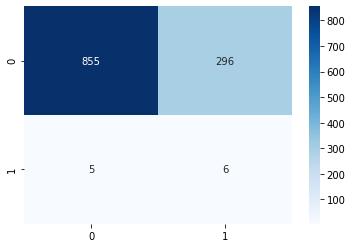

In [27]:
# visualização da matriz de confusão graficamente

cnn = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [28]:
# percentual de acerto do modelo das pessoas que tem confiança 'boa'

859 / (859 + 288)

0.7489102005231038

In [29]:
# percentual de acerto do modelo das pessoas que tem confiança 'ruim'

14 / (14 + 1)

0.9333333333333333

In [30]:
# Tecnica de subamostragem(undersampling) - Tomek links


tl = TomekLinks(sampling_strategy = 'majority')                 # apaga somente registros da classe majoritária(ratio = 'majority')
X_under, y_under = tl.fit_resample(X, y)

In [31]:
# Visualização da quantidade de registros

X_under.shape, y_under.shape

((5417, 74), (5417,))

In [32]:
# Visualização da quantidade de registros por classe da base de dados original

np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507], dtype=int64))

In [33]:
# Visualização da quantidade de registros por classe da base de dados com aplicação de subamostragem

np.unique(y_under, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([3910, 1507], dtype=int64))

In [34]:
# Novo modelo de classificação com nova base de dados
X_treino_u, X_teste_u, y_treino_u, y_teste_u = train_test_split(X_under, y_under, test_size=0.2, stratify=y_under)

# Visualização da quantidade de registros
X_treino_u.shape, y_teste_u.shape

((4333, 74), (1084,))

In [35]:
# criação do modelo

modelo_u = RandomForestClassifier()                         # definição do modelo na variável modelo
modelo_u.fit(X_treino_u, y_treino_u)                        # treinamento do modelo com a nova base de dados subamostrada

RandomForestClassifier()

In [36]:
# predição dos dados de teste com o modelo treinado

previsoes_u = modelo_u.predict(X_teste_u)

In [37]:
# comparando os registros reais com as previsões

accuracy_score(previsoes_u, y_teste_u)

0.7306273062730627

In [38]:
# matriz de confusão comparando a qualidade dos registros reais com as previsões

cm_u = confusion_matrix(previsoes_u, y_teste_u)
cm_u

array([[775, 285],
       [  7,  17]], dtype=int64)

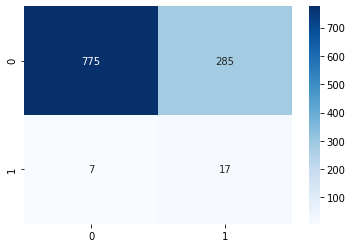

In [39]:
# visualização da matriz de confusão graficamente

cnn = sns.heatmap(cm_u, annot=True, fmt='d', cmap='Blues')

In [40]:
# percentual de acerto do modelo das pessoas que tem confiança 'boa'

768 / (768 + 288)

0.7272727272727273

In [41]:
# percentual de acerto do modelo das pessoas que tem confiança 'ruim'

14 / (14 + 14)

0.5

In [42]:
# Tecnica de sobreamostragem(oversampling) - SMOTE

smote = SMOTE(sampling_strategy = 'minority')                 # aumenta somente registros da classe minoritária(ratio = 'minority')
X_over, y_over = smote.fit_resample(X, y)                     # aplicação da subamostragem na base de dados original

In [43]:
# Visualização da quantidade de registros

X_over.shape, y_over.shape

((8598, 74), (8598,))

In [44]:
# Visualização da quantidade de registros por classe da base de dados original

np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507], dtype=int64))

In [45]:
# Visualização da quantidade de registros por classe da base de dados aumetada

np.unique(y_over, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 4299], dtype=int64))

In [46]:
# Novo modelo de classificação com nova base de dados
X_treino_o, X_teste_o, y_treino_o, y_teste_o = train_test_split(X_over, y_over, test_size=0.2, stratify=y_over)

# Visualização da quantidade de registros
X_treino_o.shape, y_teste_o.shape

((6878, 74), (1720,))

In [47]:
# criação do modelo

modelo_o = RandomForestClassifier()                         # definição do modelo na variável modelo
modelo_o.fit(X_treino_o, y_treino_o)                        # treinamento do modelo com a nova base de dados subamostrada

RandomForestClassifier()

In [48]:
# predição dos dados de teste com o modelo treinado

previsoes_o = modelo_o.predict(X_teste_o)

In [49]:
# comparando os registros reais com as previsões

accuracy_score(previsoes_o, y_teste_o)

0.8180232558139535

In [50]:
# matriz de confusão comparando a qualidade dos registros reais com as previsões

cm_o = confusion_matrix(previsoes_o, y_teste_o)
cm_o

array([[705, 158],
       [155, 702]], dtype=int64)

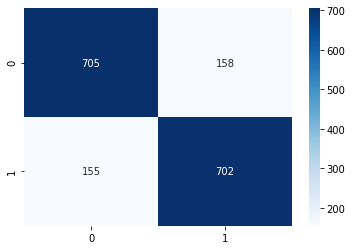

In [51]:
# visualização da matriz de confusão graficamente

cnn = sns.heatmap(cm_o, annot=True, fmt='d', cmap='Blues')

In [52]:
# percentual de acerto do modelo das pessoas que tem confiança 'boa'

683 / (683 + 145)

0.8248792270531401

In [53]:
# percentual de acerto do modelo das pessoas que tem confiança 'ruim'

715 / (715 + 177)

0.8015695067264574